# Political Violence Targeting Women & Demonstrations Featuring Women

#### All violence targeting women, as well as demonstrations featuring women, are included in the data file below. The data in this file cover all events in which women were specifically targeted by political violence, not all events involving women in any way; the file also covers all demonstration events in which women were specifically featured, not all demonstrations involving women. 

#### This dataset was extract from ACLED Access Portal and we perform EDA using Python.


## Data Collection & Data Exploration

We import pandas and necessary libraries for dataframe manipulation and analysis.

In [1]:
# Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from datetime import datetime, date


In [2]:
from pol_violence.data_loaded import load_dataframe

df_gpv = load_dataframe()

#### Exploring attributes of date.time

In [3]:
df_gpv['date'][0]

datetime.date(2024, 9, 27)

In [4]:
df_gpv['date'][0].year

2024

In [5]:
df_gpv['date'][0].month

9

In [6]:
df_gpv['date'][0].day

27

#### Exploring the dataset

In [7]:
# First rows are checked

display(df_gpv.head(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,South America,Brazil,Sorriso,-12.5453,-55.7114,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,South America,Ecuador,Guayaquil,-2.1962,-79.8862,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27


In [8]:
# Last five rows are checking

display(df_gpv.tail(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,Eastern Africa,Rwanda,Ruhengeri,-1.4998,29.635,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15
75562,1997-01-06,Violence against civilians,Attack,Identity militia,Identity militia-Civilians,562,Western Africa,Niger,Niamey,13.5200,2.120,A french woman was shot and killed by Tuareg r...,1,1997-01-06


In [9]:
# Columns's names are checked

display(df_gpv.keys())

Index(['event_date', 'event_type', 'sub_event_type', 'inter1', 'interaction',
       'iso', 'region', 'country', 'location', 'latitude', 'longitude',
       'notes', 'fatalities', 'date'],
      dtype='object')

In [10]:
# Structural Overview of the DataFrame

df_gpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_date      75563 non-null  object 
 1   event_type      75563 non-null  object 
 2   sub_event_type  75563 non-null  object 
 3   inter1          75563 non-null  object 
 4   interaction     75563 non-null  object 
 5   iso             75563 non-null  int64  
 6   region          75563 non-null  object 
 7   country         75563 non-null  object 
 8   location        75563 non-null  object 
 9   latitude        75563 non-null  float64
 10  longitude       75563 non-null  float64
 11  notes           75563 non-null  object 
 12  fatalities      75563 non-null  int64  
 13  date            75563 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 8.1+ MB


In [11]:
# Basic statistical description (numerical columns)

df_gpv.describe()

,iso,latitude,longitude,fatalities
count,75563.000000,75563.000000,75563.000000,75563.000000
mean,457.337401,23.442707,12.084752,0.255323
std,251.661696,20.843715,72.187548,4.010021
min,0.000000,-54.806200,-171.755300,0.000000
25%,276.000000,13.212700,-65.216900,0.000000
50%,410.000000,26.664500,25.208100,0.000000
75%,710.000000,37.597100,73.685400,0.000000
max,894.000000,72.913600,178.448700,750.000000


In [12]:
# Displaying random column
df_gpv['inter1']

0        Political militia
1        Political militia
2        Political militia
3        Political militia
4             State forces
               ...        
75558          Rebel group
75559          Rebel group
75560          Rebel group
75561    Political militia
75562     Identity militia
Name: inter1, Length: 75563, dtype: object

#### Checking unique values

In [13]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [14]:
df_gpv['event_type'].unique()

array(['Violence against civilians', 'Protests', 'Riots',
       'Strategic developments', 'Explosions/Remote violence'],
      dtype=object)

In [15]:
df_gpv['inter1'].unique()


array(['Political militia', 'State forces', 'Protesters', 'Rioters',
       'Identity militia', 'External/Other forces', 'Rebel group',
       'Civilians'], dtype=object)

In [16]:
df_gpv['interaction'].unique()

array(['Political militia-Civilians', 'State forces-Civilians',
       'Protesters only', 'Rioters-Civilians',
       'Identity militia-Civilians', 'External/Other forces-Civilians',
       'Rebel group-Civilians', 'State forces-Protesters',
       'State forces-Rioters', 'Rioters only', 'Protesters-Protesters',
       'Rebel group-Protesters', 'Civilians only', 'Rioters-Protesters',
       'Rioters-Rioters', 'Political militia-Protesters',
       'Civilians-Civilians', 'Protesters-External/Other forces',
       'Identity militia only', 'Rioters-External/Other forces',
       'Political militia-Rioters', 'Rebel group-Rioters',
       'Identity militia-Protesters'], dtype=object)

In [17]:
df_gpv['sub_event_type'].unique()

array(['Sexual violence', 'Attack', 'Abduction/forced disappearance',
       'Peaceful protest', 'Mob violence', 'Protest with intervention',
       'Violent demonstration', 'Arrests', 'Looting/property destruction',
       'Other', 'Excessive force against protesters', 'Grenade',
       'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Disrupted weapons use',
       'Air/drone strike', 'Suicide bomb'], dtype=object)

#### Handling missing data

In [18]:
# Missing values are identifying

df_gpv.isnull().sum()

event_date        0
event_type        0
sub_event_type    0
inter1            0
interaction       0
iso               0
region            0
country           0
location          0
latitude          0
longitude         0
notes             0
fatalities        0
date              0
dtype: int64

## Pre-processing data

In [19]:
df_gpv[df_gpv['fatalities']== 750].iloc[0]['notes']

'On 18 August 2011, Murle militia attacked the town of Pieri (Uror county, Jonglei state), killing at least 750 Lou Nuer residents. Nearly 1,000 were wounded, and dozens of women as well as children were abducted. 38,000 head of cattle were allegedly stolen.'

In [20]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [21]:
region_map = {
    'africa': ['Southern Africa', 'Northern Africa', 'Middle Africa', 'Western Africa', 'Eastern Africa'],
    'middle east': ['Middle East'],
    'asia':['Caucasus and Central Asia', 'Sotheast Asia', 'South Asia', 'East Asia'],
    'america and caribbean' :[ 'South America', 'North America', 'Central America', 'Caribbean'],
    'europe': ['Europe'],
    'oceania': ['Oceania']
}


In [22]:
# Flatten the mapping to map each element to its group
flattened_map = {item: key for key, values in region_map.items() for item in values}

#flattened_map = {}
#for key, values in region_map.items():
#    for item in values:
#        flattened_map[item] = key


In [23]:
#new_column = {'region': ['america', 'middle east', 'asia', 'america and caribbean', 'europe', 'oceania']}

df_gpv['region'] = df_gpv['region'].map(flattened_map)

display(df_gpv)

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,america and caribbean,Brazil,Sorriso,-12.5453,-55.7114,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,america and caribbean,Ecuador,Guayaquil,-2.1962,-79.8862,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27
2,2024-09-27,Violence against civilians,Abduction/forced disappearance,Political militia,Political militia-Civilians,484,america and caribbean,Mexico,Tijuana,32.5325,-117.0190,"Around 27 September 2024 (as reported), in Tij...",0,2024-09-27
3,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,484,america and caribbean,Mexico,Ciudad de Mexico - Gustavo A. Madero,19.4829,-99.1135,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,2024-09-27
4,2024-09-27,Violence against civilians,Attack,State forces,State forces-Civilians,887,middle east,Yemen,Al Yahari,13.9966,44.0604,"On 27 September 2024, a Houthi-affiliated fema...",0,2024-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75558,1997-03-05,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,800,africa,Uganda,Palabek,3.4333,32.5667,After failing to find deserters they captured ...,9,1997-03-05
75559,1997-02-24,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,12,africa,Algeria,Berrouaghia,36.1352,2.9109,24 March: 5 young girls were killed in Berroua...,5,1997-02-24
75560,1997-01-22,Violence against civilians,Sexual violence,Rebel group,Rebel group-Civilians,694,africa,Sierra Leone,Magburaka,8.7167,-11.9500,Week of 22 January. RUF forces attacked civili...,40,1997-01-22
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,africa,Rwanda,Ruhengeri,-1.4998,29.6350,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15


## Plotting data

#### Region vs Fatalities

In [24]:
df_gpv['region'].unique()

array(['america and caribbean', 'middle east', 'africa', 'europe', 'asia',
       nan, 'oceania'], dtype=object)

In [25]:
group_region_fatalities = df_gpv.groupby('region')['fatalities'].sum()

fatalities_per_region = group_region_fatalities.to_dict()

fatalities_per_region

{'africa': 9194,
 'america and caribbean': 6709,
 'asia': 692,
 'europe': 106,
 'middle east': 1629,
 'oceania': 54}

In [ ]:
plt.bar(fatalities_per_region.keys(), fatalities_per_region.values())
plt.xlabel('Region')
plt.ylabel('Fatalities')
plt.title('Region vs Fatalities')
plt.xticks(rotation=45)

plt.show()

#customize beautifuly PLEASE

#### Country vs Sub_type

In [ ]:
# Distribution of region grouped by subtypes
plt.figure(figsize=(10, 10))
sns.countplot(data=df_gpv, x='region', hue='sub_event_type')
plt.title('Distribution of region grouped by subtypes')
plt.xlabel('region')
plt.ylabel('subtypes')
plt.legend(title='Region vs Subtypes')
plt.show()


### Function "get_notes"

In [ ]:
display(df_gpv)

In [ ]:
# 'location' exploration
df_gpv['location'].unique()

In [ ]:
#'region' and 'location' are grouped
region_c = df_gpv.groupby('region')['country'].unique()
region_c

In [ ]:
type(region_c)

In [ ]:
#asociamos region/country con 'location' como diccionario
r_c_location = df_gpv.groupby(region_c)['location']

r_c_location.to_dict()

In [ ]:
grouped_counts = df_gpv.groupby('region')['sub_event_type'].value_counts()

display(grouped_counts)

In [ ]:
#Let's grouped region and events to see counts
counts_dict = grouped_counts.to_dict()

display(counts_dict)

In [ ]:
counts_dict[('africa','Mob violence')]

In [ ]:
region = df_gpv['region'].any()
event = df_gpv['sub_event_type'].any()

In [ ]:
def get_count_by_region_event(counts_dict: dict, region: str, event: str) -> int:
    for (region,event), counts in counts_dict.items():
        return f"The number of {event} in {region} is {counts_dict[(region, event)]}"

In [ ]:
get_count_by_region_event(counts_dict, 'africa', 'Attack')

In [ ]:
counts_dict

#### Functions that give plots

In [ ]:

def plot_fatalities_per_region(fatalities_per_region: dict)-> object:

    fig = plt.bar(fatalities_per_region.keys(), fatalities_per_region.values())
    plt.xlabel('Region')
    plt.ylabel('Fatalities')
    plt.title('Region vs Fatalities')
    plt.xticks(rotation=45)

    plt.show()

    return fig


In [ ]:
plot_fatalities_per_region(fatalities_per_region)

In [ ]:

def plot_stacked_bar(grouped_counts: pd.DataFrame) -> object:
    stacked_df = grouped_counts.unstack(fill_value=0)  

    plt.figure(figsize=(12, 6))
    fig = stacked_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

    plt.title('Stacked Bar Chart of Sub-event Counts by Region')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig

In [ ]:
plot_stacked_bar(grouped_counts)

In [ ]:

def plot_region_event_ondemand(counts_dict: dict, region: str, event: str) -> object:
    
    filtered_data = {(region, event): counts_dict.get((region, event), 0)}# Returns the value if found, and 0 if not found (default value)

    x_labels = [f"{region} - {event}"]  # Single bar for the specified region-event
    colors = ['mediumslateblue']  # Highlight color for the bar

    fig, ax = plt.subplots(figsize=(6, 4))

    bars = ax.bar(x_labels, filtered_data.values(), color=colors)

    ax.set_xlabel('Event per Region', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Counting Events per Region', fontsize=14)
    ax.tick_params(axis='x', rotation=0)

    plt.close()
    return fig


In [ ]:
plot_region_event_ondemand(counts_dict, 'asia', 'Peaceful protest')

In [ ]:
def plot_all_region_event_highlight(counts_dict: dict, region: str, event: str) -> object:

    colors = []
    x_etiquette = []
    values = []

    for (key, value) in counts_dict.items():
        x_etiquette.append(f"{key[0]} - {key[1]}")
        values.append(value)
        
        # Highlight selected region-event
        if key == (region, event):
            colors.append('c')
        else:
            colors.append('darkslategray')
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bars
    bars = ax.bar(x_etiquette, values, color=colors)
    
    # Add value labels on top of bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom')
    
    ax.set_xlabel('Events per Region', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Event Counts by Region (Highlighting {region} - {event})', 
                 fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7, axis='y')
    
    # Adjust layout
    plt.tight_layout()
    plt.close()
    return fig


In [ ]:
plot_all_region_event_highlight(counts_dict, 'asia', 'Attack')

In [ ]:
from pol_violence.plots import plot_fatalities_per_region

In [ ]:
plot_fatalities_per_region(fatalities_per_region)


### Upgrading 'plot_all_region_event_highlight'
##### We need a function with two outputs : one with event by region gruoped an the other one, maybe we have to use an existing function and including it as scope.


In [ ]:
#checking data types
type(df_gpv['sub_event_type'])


pandas.core.series.Series

In [28]:
type(df_gpv['region'])

pandas.core.series.Series

In [29]:
print(df_gpv['sub_event_type'].dtype)
print(df_gpv['region'].dtype)

object
object


In [30]:
#events per region are grouped
event_per_region = df_gpv.groupby('sub_event_type')['region'].value_counts()
display(event_per_region)

sub_event_type                  region               
Abduction/forced disappearance  africa                   1371
                                america and caribbean     578
                                asia                      560
                                middle east               356
                                europe                     46
                                                         ... 
Violent demonstration           america and caribbean     446
                                asia                      370
                                africa                    201
                                europe                     72
                                oceania                     1
Name: count, Length: 81, dtype: int64

In [53]:
#we convert counts_event_per_region in a  dictionary
counts_event_per_region = event_per_region.to_dict()

In [54]:
display(counts_event_per_region)

{('Abduction/forced disappearance', 'africa'): 1371,
 ('Abduction/forced disappearance', 'america and caribbean'): 578,
 ('Abduction/forced disappearance', 'asia'): 560,
 ('Abduction/forced disappearance', 'middle east'): 356,
 ('Abduction/forced disappearance', 'europe'): 46,
 ('Abduction/forced disappearance', 'oceania'): 2,
 ('Air/drone strike', 'middle east'): 15,
 ('Air/drone strike', 'africa'): 2,
 ('Arrests', 'america and caribbean'): 144,
 ('Arrests', 'middle east'): 58,
 ('Arrests', 'asia'): 22,
 ('Arrests', 'africa'): 21,
 ('Arrests', 'europe'): 3,
 ('Attack', 'america and caribbean'): 6515,
 ('Attack', 'africa'): 3036,
 ('Attack', 'asia'): 1206,
 ('Attack', 'middle east'): 967,
 ('Attack', 'europe'): 187,
 ('Attack', 'oceania'): 7,
 ('Disrupted weapons use', 'africa'): 1,
 ('Disrupted weapons use', 'middle east'): 1,
 ('Excessive force against protesters', 'middle east'): 82,
 ('Excessive force against protesters', 'africa'): 81,
 ('Excessive force against protesters', 'asia

In [ ]:
# we convert the dictionary into a Pandas DataFrame
df = pd.DataFrame.from_dict(counts_event_per_region, orient='index', columns=['Count'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['Event type', 'Region'])
df = df.reset_index()

In [ ]:

def plot_events_per_region(counts_event_per_region: pd.DataFrame, region: str, event: str) -> object:
    
    fig = plt.bar([counts_event_per_region.keys(), counts_event_per_region.values()], height=12)
    plt.xlabel('Event per region')
    plt.ylabel('Counts events')
    plt.title('Counting events per region')
    plt.xticks(rotation=45)

    plt.show()

    return fig

TypeError: unhashable type: 'dict_keys'

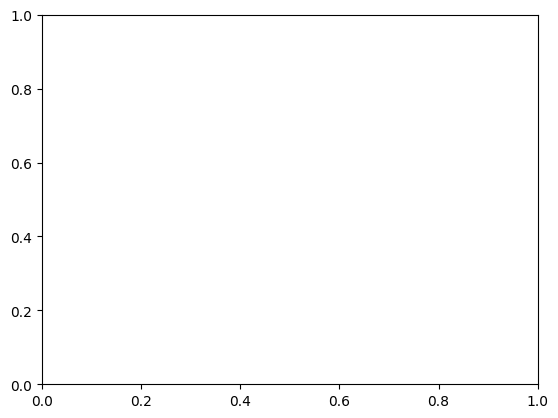

In [51]:
plot_events_per_region(counts_event_per_region, 'europe', 'Attack')

### Challenge

##### 1. Crear una clase `DataProcessor` para nuestro problema específico, que guarde el DataFrame y cualquier variable que necesite nuestro script como atributos.
##### 2. Convertir las funciones de plot que ya funcionan, a métodos utilizando los atributos del objeto en lugar de pasar las cosas como parámetro.

In [ ]:
plot_fatalities_per_region(fatalities_per_region)

In [ ]:
df_gpv['sub_event_type'].unique()

In [ ]:
category_colors = {
    'A':'#6A5ACD', 
    'B':'#6B8E23', 
    'C': '#BA55D3', 
    'D':'#B8860B', 
    'E':'#20B2AA', 
    'F':'#4682B4',
    'G':'#8B4513', 
    'H':'#B22222', 
    'I':'#6495ED', 
    'J':'#BDB76B', 
    'K':'#CD853F', 
    'J': '#48D1CC',
    'L': '#2F4F4F',
    'M':'#2E8B57',
    'N':'#5F9EA0', 
    'O': '#BC8F8F',
    'P':'#CD5C5C', 
    'Q':'#DDA0DD'
}
df_gpv['Color'] = df_gpv['sub_event_type'].map(category_colors)

In [ ]:
geo_data = df_gpv[[
    'country',
    'sub_event_type',
    'latitude',
    'longitude'
]]
   
df_geo = pd.DataFrame(geo_data)

In [ ]:
df_geo

In [ ]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df_geo, geometry= gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]), crs=4326)
gdf

In [ ]:
gdf.to_file('polvioliolence.geojson', driver="GeoJSON")

In [ ]:
from keplergl import KeplerGl
m = KeplerGl(height = 600)
m.add_data(gdf, "asd")
m

In [ ]:
# Initialize the map centered on a rough global midpoint
m = folium.Map(location=[0, 0], zoom_start=2)

# Add a marker cluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in df_geo.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Region: {row['Region']}<br>Category: {row['Category']}",
        icon=folium.Icon(color=category_colors[row['Category']])
    ).add_to(marker_cluster)

In [ ]:
region = df_gpv['region'].any()
event = df_gpv['sub_event_type'].any()

def get_count_by_region_event(counts_dict: dict, region: str, event: str) -> int:
        
        return f"The number of {event} in {region} is {counts_dict[(region, event)]}"

In [ ]:
get_count_by_region_event(counts_dict,'asia','Peaceful protest')

In [ ]:
display(counts_dict)

In [ ]:
import matplotlib.pyplot as plt

def get_random_plot():
    fig, axes = plt.subplots(1,2)

    a = [2,3,5,7,11,13]
    b = [1,1,2,3,5,8,13]

    axes[0].plot(a)
    axes[1].plot(b)
    return fig

fig = get_random_plot()